In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import sklearn as sk

In [4]:
import scipy

In [5]:
from math import sqrt

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn import svm

In [9]:
from sklearn import tree

In [10]:
 from sklearn.tree import DecisionTreeClassifier

In [11]:
from sklearn.linear_model import SGDClassifier

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn import metrics

In [14]:
 from sklearn.neural_network import MLPClassifier

In [15]:
from sklearn import linear_model

In [16]:
from sklearn.metrics import r2_score

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from pandas import ExcelWriter

In [20]:
from pandas import ExcelFile 

In [21]:
Sample = pd.read_excel('MUESTRA_FINAL.xlsx')

In [22]:
Sample.head()

,ID,ATRASO,EDAD,SALDO,SIN_SALDO_HOY,ANTIGUEDAD,referencia_rescate,MARCA_RESCATE,TARJETA_ACTIVA,sexo,...,MARCA_BAJA_U6M,MARCA_BAJA_U3M,MARCA_CONGELADA,NACIONAL,MAX_MORAU12M,MAX_MORAU6M,MAX_MORAU3M,AREA_RIESGO,PROVINCIA,MARCA_SOLTERO
0,1,0,43,0.000,1,102,NaN,0,1,1,...,0,0,0,1,0,0,0,0,SAN JOSE,0
1,2,0,48,393271.688,0,101,NaN,0,1,1,...,1,1,0,1,29,29,15,0,SAN JOSE,0
2,3,0,49,-149.940,1,101,NaN,0,1,0,...,1,0,0,1,0,0,0,0,SAN JOSE,0
3,4,0,41,221759.380,0,101,NaN,0,1,1,...,1,1,0,1,1,1,1,0,SAN JOSE,0
4,5,0,35,173511.850,0,101,NaN,0,1,0,...,1,1,0,1,2,2,1,0,ALAJUELA,0


In [23]:
Sample.describe()

,ID,ATRASO,EDAD,SALDO,SIN_SALDO_HOY,ANTIGUEDAD,MARCA_RESCATE,TARJETA_ACTIVA,sexo,estado_civil,...,BAJA_SALDO_U3M,MARCA_BAJA_U6M,MARCA_BAJA_U3M,MARCA_CONGELADA,NACIONAL,MAX_MORAU12M,MAX_MORAU6M,MAX_MORAU3M,AREA_RIESGO,MARCA_SOLTERO
count,26693.000000,26693.000000,26693.000000,2.669300e+04,26693.000000,26693.000000,26693.00000,26693.000000,26693.000000,26017.000000,...,26693.000000,26693.000000,26693.000000,26693.000000,26693.000000,26693.000000,26693.000000,26693.000000,26693.000000,26693.000000
mean,13347.000000,0.451317,40.803656,2.332368e+05,0.334170,43.395572,0.10351,0.951710,0.551942,2.161279,...,1.277901,0.785187,0.709175,0.084254,0.974188,4.924362,3.075188,2.052860,0.143895,0.340651
std,7705.749704,3.702806,29.202937,4.388865e+05,0.471708,25.505063,0.30463,0.214382,0.497304,1.425169,...,1.019085,0.410700,0.454152,0.277774,0.158577,10.227500,8.232825,6.707859,0.350990,0.473937
min,1.000000,0.000000,-1093.000000,-5.939236e+05,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6674.000000,0.000000,31.000000,0.000000e+00,0.000000,20.000000,0.00000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13347.000000,0.000000,39.000000,9.226640e+04,0.000000,43.000000,0.00000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20020.000000,0.000000,51.000000,2.940787e+05,1.000000,64.000000,0.00000,1.000000,1.000000,2.000000,...,2.000000,1.000000,1.000000,0.000000,1.000000,5.000000,2.000000,0.000000,0.000000,1.000000
max,26693.000000,88.000000,2018.000000,1.337999e+07,1.000000,102.000000,1.00000,1.000000,1.000000,6.000000,...,3.000000,1.000000,1.000000,1.000000,1.000000,92.000000,92.000000,92.000000,1.000000,1.000000


In [24]:
#En la tabla anterior se observa que hay campos con valores pérdidos. Además, se tiene casos con valores atípicos e 
#inconsistencias dada la naturaleza de la variable, como lo es el caso de la Edad, donde se muestran valores negativos y de 
#más de 2 mil años. La desviación estandár del saldo es muy grande, lo que se respalda por un valor máximo muy alto en 
#comparación con el 75% de los casos.

In [25]:
Sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26693 entries, 0 to 26692
Data columns (total 52 columns):
ID                        26693 non-null int64
ATRASO                    26693 non-null int64
EDAD                      26693 non-null int64
SALDO                     26693 non-null float64
SIN_SALDO_HOY             26693 non-null int64
ANTIGUEDAD                26693 non-null int64
referencia_rescate        2763 non-null object
MARCA_RESCATE             26693 non-null int64
TARJETA_ACTIVA            26693 non-null int64
sexo                      26693 non-null int64
estado_civil              26017 non-null float64
tipo_ingreso              11262 non-null object
AJUSTE_PLAN_CUOTAS        26693 non-null int64
CANCELACION_ANTICIPADA    26693 non-null int64
ERROR_PAGO_SERVICIOS      26693 non-null int64
INCONSISTENCIA_CTA        26693 non-null int64
PAGO_INCORRECTO           26693 non-null int64
REVERSO_ADMCTA            26693 non-null int64
REVERSO_CPMV              26693 non-null

In [26]:
#Por otro lado, una serie de variables se muestran con tipo numérico o integer y en realidad son variables categóricas, por ejemplo,
#Marca rescate, estado civil, rango de límite, baja_saldo_u6m, etc.

In [27]:
Sample['SIN_SALDO_HOY'] = Sample['SIN_SALDO_HOY'].apply(str)

In [28]:
Sample['sexo'] = Sample['sexo'].apply(str)

In [29]:
Sample['MARCA_RESCATE'] = Sample['MARCA_RESCATE'].apply(str)

In [30]:
Sample['TARJETA_ACTIVA'] = Sample['TARJETA_ACTIVA'].apply(str)

In [31]:
Sample['estado_civil'] = Sample['estado_civil'].apply(str)

In [32]:
Sample['ERROR_PAGO_SERVICIOS'] = Sample['ERROR_PAGO_SERVICIOS'].apply(str)

In [33]:
Sample['PAGO_INCORRECTO'] = Sample['PAGO_INCORRECTO'].apply(str)

In [34]:
Sample['REVERSO_EDC'] = Sample['REVERSO_EDC'].apply(str)

In [35]:
Sample['Q_MONETARY'] = Sample['Q_MONETARY'].apply(str)

In [36]:
Sample['Q_FREQUENCY'] = Sample['Q_FREQUENCY'].apply(str)

In [37]:
Sample['Q_RECENCY'] = Sample['Q_RECENCY'].apply(str)

In [38]:
Sample['MARCA_CONGELADA'] = Sample['MARCA_CONGELADA'].apply(str)

In [39]:
Sample['NACIONAL'] = Sample['NACIONAL'].apply(str)

In [40]:
Sample['AREA_RIESGO'] = Sample['AREA_RIESGO'].apply(str)

In [41]:
Sample['MARCA_SOLTERO'] = Sample['MARCA_SOLTERO'].apply(str)

In [42]:
Sample['MARCA_QUEJAS'] = Sample['MARCA_QUEJAS'].apply(str)

In [43]:
Sample['MARCA_SIN_SALDO_U12M'] = Sample['MARCA_SIN_SALDO_U12M'].apply(str)

In [44]:
Sample['MARCA_SIN_SALDO_U6M'] = Sample['MARCA_SIN_SALDO_U6M'].apply(str)

In [45]:
Sample['MARCA_SIN_SALDO_U3M'] = Sample['MARCA_SIN_SALDO_U3M'].apply(str)

In [46]:
Sample['MARCA_BAJA_U6M'] = Sample['MARCA_BAJA_U6M'].apply(str)

In [47]:
Sample['MARCA_BAJA_U3M'] = Sample['MARCA_BAJA_U3M'].apply(str)

In [48]:
Sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26693 entries, 0 to 26692
Data columns (total 52 columns):
ID                        26693 non-null int64
ATRASO                    26693 non-null int64
EDAD                      26693 non-null int64
SALDO                     26693 non-null float64
SIN_SALDO_HOY             26693 non-null object
ANTIGUEDAD                26693 non-null int64
referencia_rescate        2763 non-null object
MARCA_RESCATE             26693 non-null object
TARJETA_ACTIVA            26693 non-null object
sexo                      26693 non-null object
estado_civil              26693 non-null object
tipo_ingreso              11262 non-null object
AJUSTE_PLAN_CUOTAS        26693 non-null int64
CANCELACION_ANTICIPADA    26693 non-null int64
ERROR_PAGO_SERVICIOS      26693 non-null object
INCONSISTENCIA_CTA        26693 non-null int64
PAGO_INCORRECTO           26693 non-null object
REVERSO_ADMCTA            26693 non-null int64
REVERSO_CPMV              26693 non

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EDE5605F8>]],
      dtype=object)

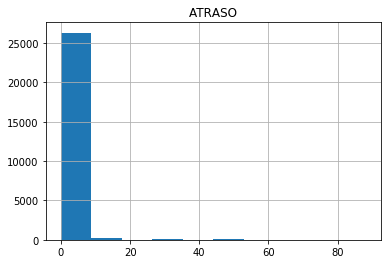

In [49]:
Sample.hist(column='ATRASO')

In [50]:
#La muestra de clientes para el estudo se toma en Enero 2018, donde seleccionan solo clientes activos, 
#es decir que pueden utilizar su tarjeta para consumir o si presenta atrasos no son mayores a 90 días. De ahí, que la
#mayoría de clientes para esa fecha se encuentre al día.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EDE611DD8>]],
      dtype=object)

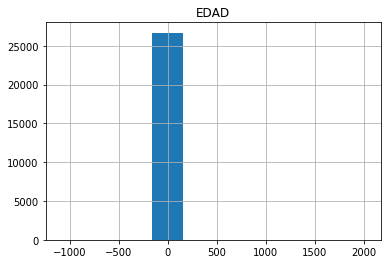

In [51]:
Sample.hist(column='EDAD')

In [52]:
#Con el histograma se confirma que la variable Edad posee valores extremos tanto positivos como negativos, por lo que 
#se debería eliminar o sustituir esos valores.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EDE5AA4E0>]],
      dtype=object)

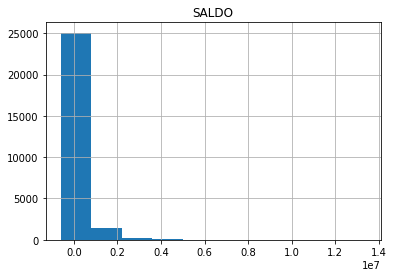

In [53]:
Sample.hist(column='SALDO')

In [54]:
#En el caso del saldo o deuda del cliente con la tarjeta se tienen clientes con saldo a favor o sin saldo pero en su mayoría
#tienen saldo positivo. Sin embargo, no se aprecia bien la distribución de los saldos porque existen pocos clientes con 
#saldos muy altos. Por ejemplo, el valor máximo es de 13 millones. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EDE719A20>]],
      dtype=object)

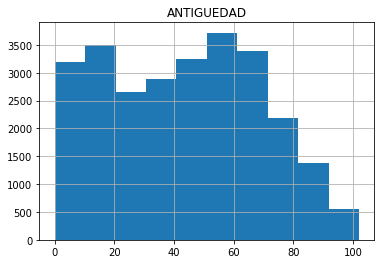

In [55]:
Sample.hist(column='ANTIGUEDAD')

In [56]:
#La mayoría de los clientes tienen entre 20 a 70 meses de antiguedad.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EDE791128>]],
      dtype=object)

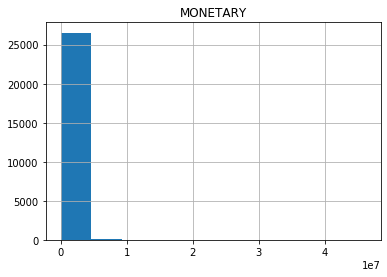

In [57]:
Sample.hist(column='MONETARY')

In [58]:
#Este campo es la suma de todas las compras hechas en un año. En el histograma se observa que de igual manera que con el 
#saldo se presentan valores extremos, por lo que no se puede observar bien la distribución de la suma de compras. El 
#valor máximo es de 46 millones.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EDE7E3A58>]],
      dtype=object)

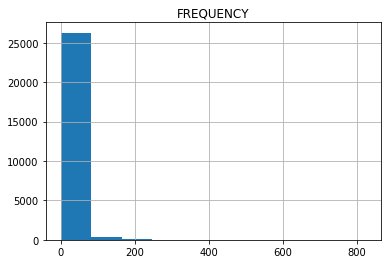

In [59]:
Sample.hist(column='FREQUENCY')

In [60]:
#El mismo caso que la variable anterior.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EDE80D780>]],
      dtype=object)

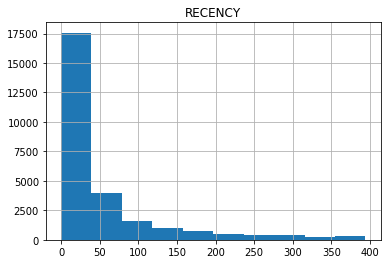

In [61]:
Sample.hist(column='RECENCY')

In [62]:
#Se tiene clientes que tienen casi un año de no realizar compras.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EDEF51AC8>]],
      dtype=object)

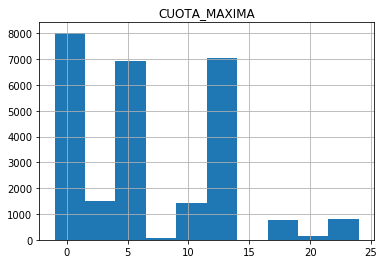

In [63]:
Sample.hist(column='CUOTA_MAXIMA')

In [64]:
#Cuando los clientes consumen en cuotas, prefieren hacerlo a 12 cuotas.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EDEFD46D8>]],
      dtype=object)

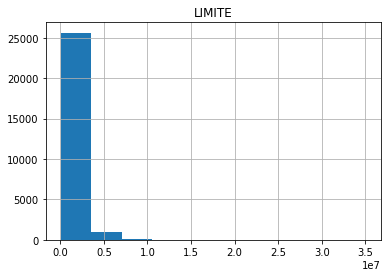

In [65]:
Sample.hist(column='LIMITE')

In [66]:
#El límite de crédito también presentan valores extremos, por ejemplo, el valor mínimo es de 70 mil 
#y el máximo de 35 millones. Lo que sesga bastante el cálculo del límite promedio de la cartera.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EDF05D2E8>]],
      dtype=object)

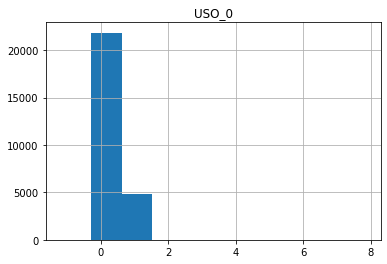

In [67]:
Sample.hist(column='USO_0')

In [68]:
#Representa el porcentaje de uso que hace el cliente de su límite de crédito. Donde se tienen valores poco razonables como
# que un cliente utilice hasta 8 veces su límite de crédito.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EDBB5AE80>]],
      dtype=object)

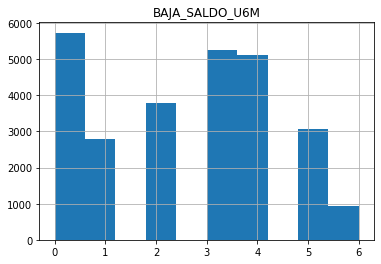

In [69]:
Sample.hist(column='BAJA_SALDO_U6M')

In [70]:
#Esta variable muestra qué tan rápido está cancelando su deuda el cliente.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EDBEACE48>]],
      dtype=object)

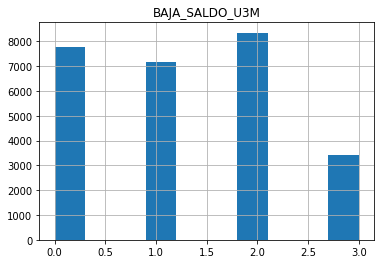

In [71]:
Sample.hist(column='BAJA_SALDO_U3M')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EDBDE1470>]],
      dtype=object)

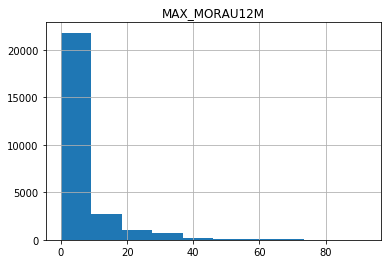

In [72]:
Sample.hist(column='MAX_MORAU12M')

In [73]:
#Son los máximos días en atraso que presentó el cliente en el último año. La mayoría se ha mantenido al día.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EDBDBAF60>]],
      dtype=object)

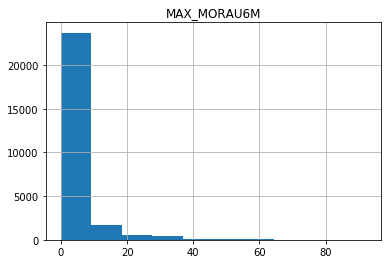

In [74]:
Sample.hist(column='MAX_MORAU6M')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EDBEB0F28>]],
      dtype=object)

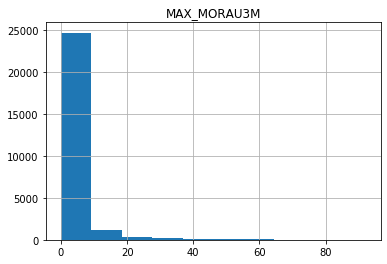

In [75]:
Sample.hist(column='MAX_MORAU3M')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EDBC961D0>]],
      dtype=object)

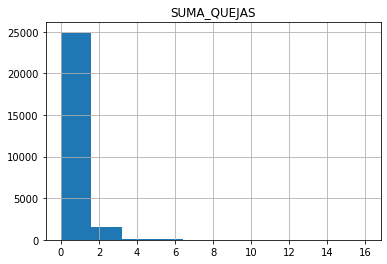

In [76]:
Sample.hist(column='SUMA_QUEJAS')

In [77]:
#En su mayoría los clientes no han tenido quejas por algunos de los cargos o servicios.

In [78]:
Sample['Q']=1

In [79]:
G1=Sample.groupby('SIN_SALDO_HOY').count().Q

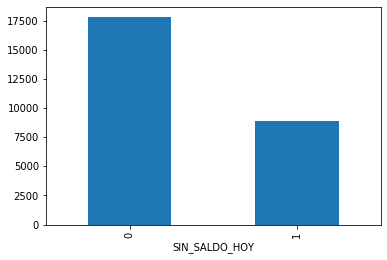

In [80]:
G1.plot.bar()

In [81]:
#El 67% de los clientes sí tienen algún tipo de saldo para Ene-18.

In [82]:
G2=Sample.groupby('MARCA_RESCATE').count().Q

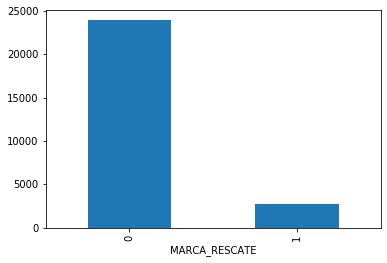

In [83]:
G2.plot.bar()

In [84]:
#El 10% de los clientes ha solicitado el cierre de su tarjeta. Esta es la variable objetivo o la variable dependiente que
#se va a predecir.

In [85]:
G3=Sample.groupby('referencia_rescate').count().Q

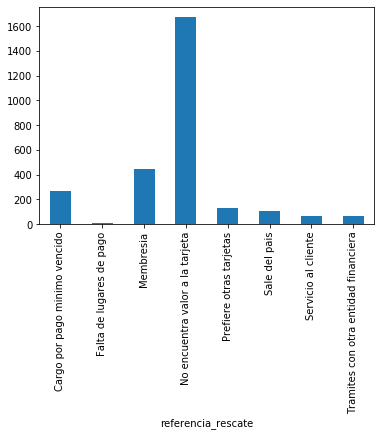

In [86]:
G3.plot.bar()

In [87]:
#El 61% de las personas que solicitan el cierre de la cuenta lo hace porque no le encuentra valor o utilidad a permanecer
#con la tarjeta, seguida de del disgusto por tener que pagar un cargo mensual de administración de cuenta.

In [88]:
G4=Sample.groupby('sexo').count().Q

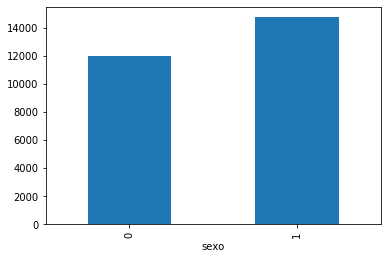

In [89]:
G4.plot.bar()

In [90]:
#En su mayoría los clientes son hombres, un 55%

In [91]:
G5=Sample.groupby('estado_civil').count().Q

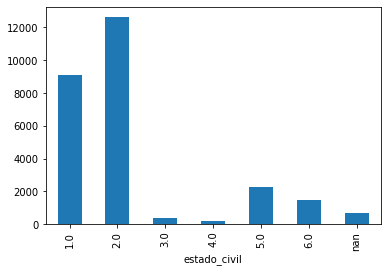

In [92]:
G5.plot.bar()

In [93]:
#Un 47% de los clientes dice estar casado, seguido de un 34% de solteros. 

In [94]:
G6=Sample.groupby('tipo_ingreso').count().Q

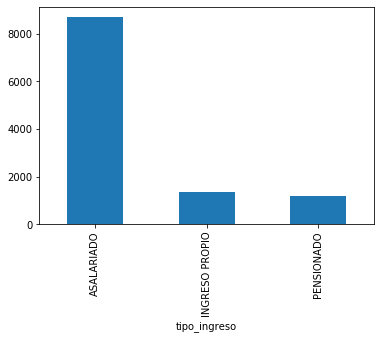

In [95]:
G6.plot.bar()

In [96]:
#Solo un 33% de clientes están clasificados como asalariados. Pero esta variable tiene una gran cantidad de clientes
#en blanco, un 58% en total.

In [97]:
G7=Sample.groupby('AJUSTE_PLAN_CUOTAS').count().Q

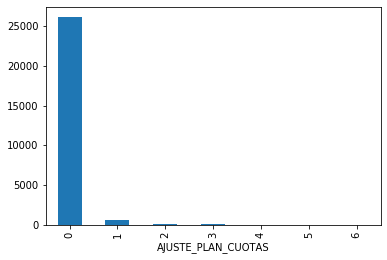

In [98]:
G7.plot.bar()

In [99]:
#El 98% de los clientes no ha tenido problemas con sus cuotas.

In [100]:
G8=Sample.groupby('ERROR_PAGO_SERVICIOS').count().Q

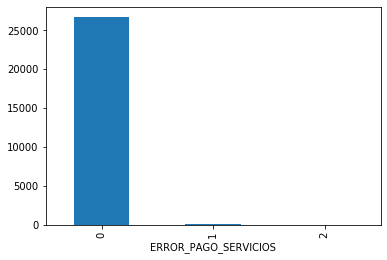

In [101]:
G8.plot.bar()

In [102]:
#Prácticamente el 99,9% de los clientes no han tenido problemas con el pago de servicios.

In [103]:
G9=Sample.groupby('INCONSISTENCIA_CTA').count().Q

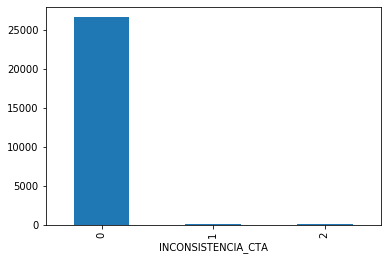

In [104]:
G9.plot.bar()

In [105]:
#De igual manera muy pocos clientes han reportado alguna inconsistencia con su cuenta.

In [106]:
G10=Sample.groupby('PAGO_INCORRECTO').count().Q

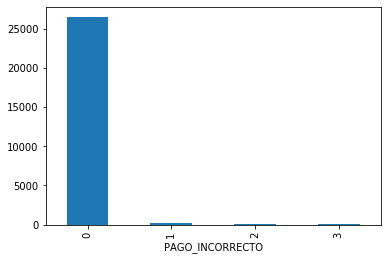

In [107]:
G10.plot.bar()

In [108]:
G11=Sample.groupby('REVERSO_ADMCTA').count().Q

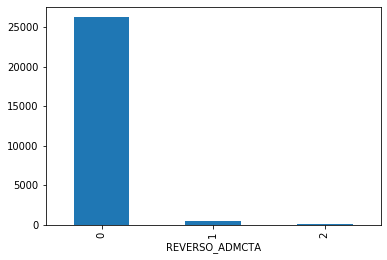

In [109]:
G11.plot.bar()

In [110]:
#El 98% no ha solicitado el reverso del cargo mensual.

In [111]:
G12=Sample.groupby('REVERSO_CPMV').count().Q

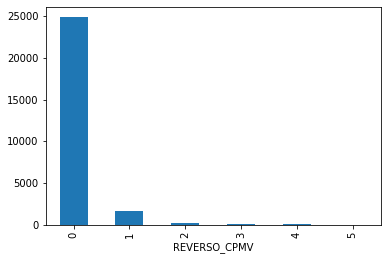

In [112]:
G12.plot.bar()

In [113]:
G13=Sample.groupby('REVERSO_EDC').count().Q

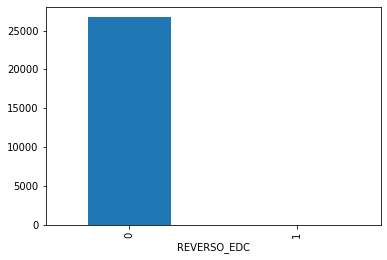

In [114]:
G13.plot.bar()

In [115]:
#El 100% no ha solicitado un reverso de este cargo.

In [116]:
G14=Sample.groupby('Q_MONETARY').count().Q

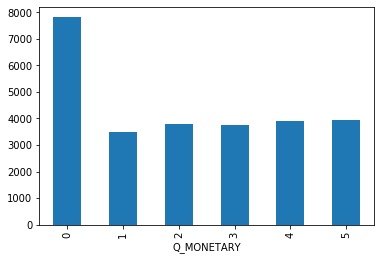

In [117]:
G14.plot.bar()

In [118]:
G15=Sample.groupby('Q_FREQUENCY').count().Q

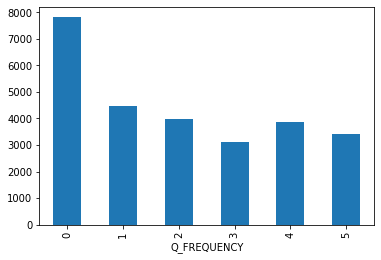

In [119]:
G15.plot.bar()

In [120]:
G16=Sample.groupby('Q_RECENCY').count().Q

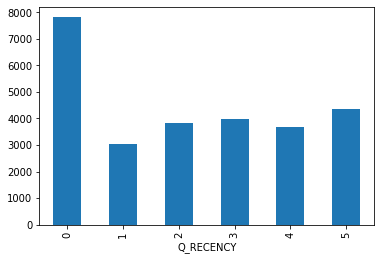

In [121]:
G16.plot.bar()

In [122]:
G17=Sample.groupby('MARCA_CONGELADA').count().Q

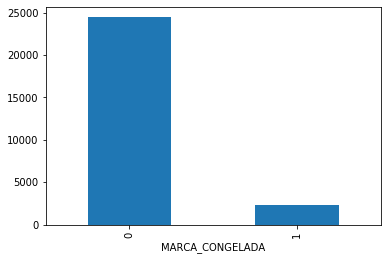

In [123]:
G17.plot.bar()

In [124]:
#Un 8% solicitó bloquear su cuenta.

In [125]:
G18=Sample.groupby('NACIONAL').count().Q

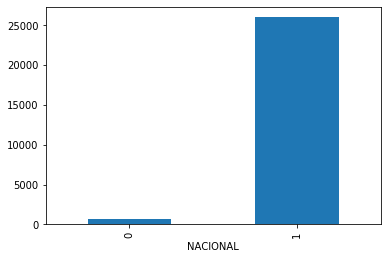

In [126]:
G18.plot.bar()

In [127]:
#El 97% es costarricense.

In [128]:
G19=Sample.groupby('AREA_RIESGO').count().Q

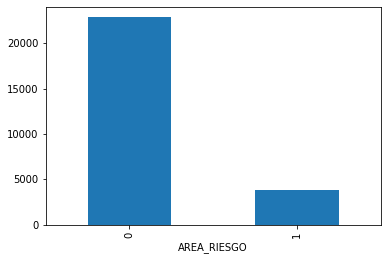

In [129]:
G19.plot.bar()

In [130]:
#Un 14% reside en un área considerada de riesgo.

In [131]:
G20=Sample.groupby('PROVINCIA').count().Q

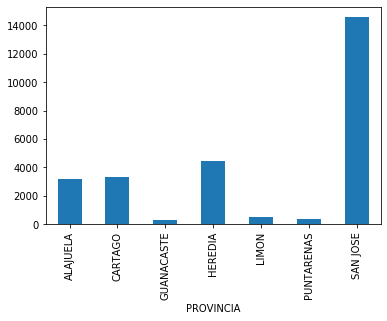

In [132]:
G20.plot.bar()

In [133]:
#uN 54% reside en San José y casi un 17% en Heredia.

In [134]:
pd.pivot_table(Sample,index=["MARCA_RESCATE"],values=["Q"],
               columns=["SIN_SALDO_HOY"],aggfunc=[np.sum])

sum      
                   Q      
SIN_SALDO_HOY      0     1
MARCA_RESCATE             
0              16175  7755
1               1598  1165

In [135]:
#los clientes que no mantienen un saldo pendiente presentan un mayor porcentaje de solicitud de cierre. 
#Un 13% vs un 9% del resto.

In [136]:
pd.pivot_table(Sample,index=["MARCA_RESCATE"],values=["Q"],
               columns=["sexo"],aggfunc=[np.sum])

sum       
                   Q       
sexo               0      1
MARCA_RESCATE              
0              10720  13210
1               1240   1523

In [137]:
#Por sexo parece no haber diferencia en cuanto a la solicitud de cierre. El porcentaje es muy similar.

In [138]:
pd.pivot_table(Sample,index=["MARCA_RESCATE"],values=["Q"],
               columns=["Q_MONETARY"],aggfunc=[np.sum])

sum                              
                  Q                              
Q_MONETARY        0     1     2     3     4     5
MARCA_RESCATE                                    
0              6821  2931  3355  3424  3665  3734
1               992   557   427   340   247   200

In [139]:
#Cuanto menos suman las compras de los clientes en el año es mayor el porcentaje de clientes que quieren cerrar la tarjeta.
#En el primer quintil el porcentaje llega a ser de un 16% vs un 5% del quintil cuyas compras suman mayor valor.

In [140]:
pd.pivot_table(Sample,index=["MARCA_RESCATE"],values=["Q"],
               columns=["Q_FREQUENCY"],aggfunc=[np.sum])

sum                              
                  Q                              
Q_FREQUENCY       0     1     2     3     4     5
MARCA_RESCATE                                    
0              6821  3692  3611  2912  3658  3236
1               992   792   380   192   215   192

In [141]:
#La misma lógica siguen los clientes con menor cantidad de compras. Cuanto menos veces utiliza la tarjeta más probable
#es que decida cerrarla. El primer quintil muestra un 18% de solicitudes de cierre.

In [142]:
pd.pivot_table(Sample,index=["MARCA_RESCATE"],values=["Q"],
               columns=["Q_RECENCY"],aggfunc=[np.sum])

sum                              
                  Q                              
Q_RECENCY         0     1     2     3     4     5
MARCA_RESCATE                                    
0              6821  2470  3372  3705  3460  4102
1               992   557   448   281   230   255

In [143]:
#De igual manera ocurre con los días desde la última compra. Los clientes que tienen casi un año de no realizar compras
#son más propensos al cierre.

In [144]:
pd.pivot_table(Sample,index=["MARCA_RESCATE"],values=["Q"],
               columns=["MARCA_CONGELADA"],aggfunc=[np.sum])

sum      
                     Q      
MARCA_CONGELADA      0     1
MARCA_RESCATE               
0                21923  2007
1                 2521   242

In [145]:
#No pasa lo mismo con los clientes que ha solicitado un bloqueo de la cuenta. Parece que no se relaciona con el hecho de 
#cerrar la cuenta. El porcentaje en ambos casos es muy similar.

In [146]:
pd.pivot_table(Sample,index=["MARCA_RESCATE"],values=["Q"],
               columns=["AREA_RIESGO"],aggfunc=[np.sum])

sum      
                   Q      
AREA_RIESGO        0     1
MARCA_RESCATE             
0              20420  3510
1               2432   331

In [147]:
#Los clientes que no viven en una zona de riesgo presentan un porcetaje de cierre mayor pero la diferencia no es grande.
#Un 11% vs un 9%

In [148]:
pd.pivot_table(Sample,index=["MARCA_RESCATE"],values=["Q"],
               columns=["PROVINCIA"],aggfunc=[np.sum])

sum                                                     
                     Q                                                     
PROVINCIA     ALAJUELA CARTAGO GUANACASTE HEREDIA LIMON PUNTARENAS SAN JOSE
MARCA_RESCATE                                                              
0                 2809    2978        237    3973   479        292    13162
1                  377     343         31     499    60         40     1413

In [149]:
#Por provincia parece no haber diferencia.

In [150]:
pd.pivot_table(Sample,index=["MARCA_RESCATE"],values=["Q"],
               columns=["MARCA_SOLTERO"],aggfunc=[np.sum])

sum      
                   Q      
MARCA_SOLTERO      0     1
MARCA_RESCATE             
0              15813  8117
1               1787   976

In [151]:
#Tampoco parece estar relacionado al estado civil del cliente.

In [152]:
pd.pivot_table(Sample,index=["MARCA_RESCATE"],values=["Q"],
               columns=["TARJETA_ACTIVA"],aggfunc=[np.sum])

sum       
                  Q       
TARJETA_ACTIVA    0      1
MARCA_RESCATE             
0               708  23222
1               581   2182

In [153]:
#Se tiene un porcentaje mayor de tarjetas inactivas en los clientes que solicitan el cierre.

In [154]:
#Correlation
corrMat = Sample.corr()
print(corrMat)

                              ID    ATRASO      EDAD     SALDO  ANTIGUEDAD  \
ID                      1.000000 -0.016291 -0.085690 -0.036408   -0.995515   
ATRASO                 -0.016291  1.000000  0.004455  0.026335    0.017246   
EDAD                   -0.085690  0.004455  1.000000  0.015902    0.087859   
SALDO                  -0.036408  0.026335  0.015902  1.000000    0.032622   
ANTIGUEDAD             -0.995515  0.017246  0.087859  0.032622    1.000000   
AJUSTE_PLAN_CUOTAS      0.005179 -0.005381 -0.006474  0.114977   -0.004314   
CANCELACION_ANTICIPADA  0.013084 -0.017625 -0.017524  0.050528   -0.012446   
INCONSISTENCIA_CTA      0.005128 -0.007927 -0.002697  0.034266   -0.004745   
REVERSO_ADMCTA         -0.038988 -0.010481 -0.006625 -0.044632    0.038884   
REVERSO_CPMV           -0.021579  0.002528  0.005078  0.001377    0.021349   
REVERSO_CPMV2          -0.026683  0.017544  0.014687 -0.040484    0.025498   
REVERSO_INTERESES       0.028553 -0.004471  0.001945  0.038582  

In [155]:
#Correlación entre Monetary y Saldo de un 66%, un 77% entre Suma_quejas y cancelación anticipada.
#Sin saldo U12M un 87% con Sin saldo U3M y un 95% con Sin saldo U6M, esto porque miden lo mismo en meses diferentes.
#Una corellación de un 85% entre Baja saldo U6M con Baja saldo U3M por la misma razón que las variables anteriores.

In [156]:
Sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26693 entries, 0 to 26692
Data columns (total 53 columns):
ID                        26693 non-null int64
ATRASO                    26693 non-null int64
EDAD                      26693 non-null int64
SALDO                     26693 non-null float64
SIN_SALDO_HOY             26693 non-null object
ANTIGUEDAD                26693 non-null int64
referencia_rescate        2763 non-null object
MARCA_RESCATE             26693 non-null object
TARJETA_ACTIVA            26693 non-null object
sexo                      26693 non-null object
estado_civil              26693 non-null object
tipo_ingreso              11262 non-null object
AJUSTE_PLAN_CUOTAS        26693 non-null int64
CANCELACION_ANTICIPADA    26693 non-null int64
ERROR_PAGO_SERVICIOS      26693 non-null object
INCONSISTENCIA_CTA        26693 non-null int64
PAGO_INCORRECTO           26693 non-null object
REVERSO_ADMCTA            26693 non-null int64
REVERSO_CPMV              26693 non

In [157]:
Sample2=Sample.iloc[:,1:53]

In [158]:
Sample3 = Sample2[(Sample2.EDAD >= 20)]

In [159]:
Sample4 = Sample3[(Sample3.EDAD <= 100)]

In [160]:
Sample4.describe()

,ATRASO,EDAD,SALDO,ANTIGUEDAD,AJUSTE_PLAN_CUOTAS,CANCELACION_ANTICIPADA,INCONSISTENCIA_CTA,REVERSO_ADMCTA,REVERSO_CPMV,REVERSO_CPMV2,...,SIN_SALDO_U3M,LIMITE,RANGO_LIMITE,USO_0,BAJA_SALDO_U6M,BAJA_SALDO_U3M,MAX_MORAU12M,MAX_MORAU6M,MAX_MORAU3M,Q
count,25630.000000,25630.000000,2.563000e+04,25630.000000,25630.000000,25630.000000,25630.00000,25630.000000,25630.000000,25630.000000,...,25630.000000,2.563000e+04,25630.000000,25630.000000,25630.000000,25630.000000,25630.000000,25630.00000,25630.000000,25630.0
mean,0.459891,42.205072,2.337590e+05,43.811471,0.025673,0.160203,0.00515,0.016660,0.078073,0.018689,...,1.027117,1.044140e+06,7.779477,0.268998,2.526531,1.272064,4.948108,3.09126,2.064417,1.0
std,3.741836,12.620422,4.404992e+05,25.324035,0.187925,0.579145,0.07633,0.129512,0.304401,0.140239,...,1.319855,1.189139e+06,4.209688,0.323677,1.805081,1.019454,10.231887,8.24998,6.720105,0.0
min,0.000000,20.000000,-5.939236e+05,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,7.000000e+04,1.000000,-1.178420,0.000000,0.000000,0.000000,0.00000,0.000000,1.0
25%,0.000000,32.000000,0.000000e+00,21.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,3.710000e+05,4.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.0
50%,0.000000,40.000000,9.146079e+04,44.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,5.950000e+05,6.000000,0.126328,3.000000,1.000000,0.000000,0.00000,0.000000,1.0
75%,0.000000,52.000000,2.953207e+05,64.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,3.000000,1.260000e+06,12.000000,0.490286,4.000000,2.000000,5.000000,2.00000,0.000000,1.0
max,88.000000,91.000000,1.337999e+07,102.000000,6.000000,15.000000,2.00000,2.000000,5.000000,3.000000,...,3.000000,3.500000e+07,16.000000,7.836546,6.000000,3.000000,92.000000,92.00000,92.000000,1.0


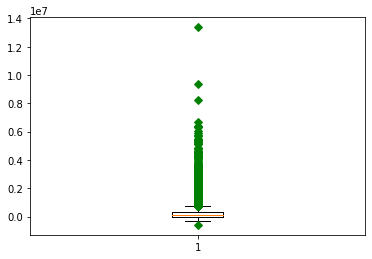

In [161]:
P= Sample4['SALDO']
plt.boxplot(P,0,'gD')
plt.show()

In [162]:
Sample5 = Sample4[(Sample4.SALDO <= 5000000)]

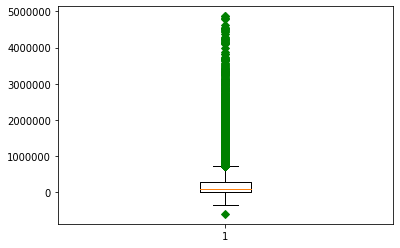

In [163]:
P1= Sample5['SALDO']
plt.boxplot(P1,0,'gD')
plt.show()

In [164]:
Sample5.describe()

,ATRASO,EDAD,SALDO,ANTIGUEDAD,AJUSTE_PLAN_CUOTAS,CANCELACION_ANTICIPADA,INCONSISTENCIA_CTA,REVERSO_ADMCTA,REVERSO_CPMV,REVERSO_CPMV2,...,SIN_SALDO_U3M,LIMITE,RANGO_LIMITE,USO_0,BAJA_SALDO_U6M,BAJA_SALDO_U3M,MAX_MORAU12M,MAX_MORAU6M,MAX_MORAU3M,Q
count,25611.000000,25611.000000,2.561100e+04,25611.000000,25611.000000,25611.000000,25611.000000,25611.000000,25611.000000,25611.000000,...,25611.000000,2.561100e+04,25611.000000,25611.000000,25611.000000,25611.000000,25611.000000,25611.000000,25611.000000,25611.0
mean,0.460076,42.197806,2.291433e+05,43.792511,0.025536,0.160127,0.005154,0.016673,0.078130,0.018703,...,1.027801,1.039304e+06,7.773379,0.268557,2.526336,1.272110,4.948225,3.091250,2.064191,1.0
std,3.743180,12.621279,4.032700e+05,25.322184,0.186973,0.579027,0.076358,0.129559,0.304506,0.140291,...,1.320049,1.174774e+06,4.205288,0.323377,1.805357,1.019618,10.234584,8.252151,6.721586,0.0
min,0.000000,20.000000,-5.939236e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7.000000e+04,1.000000,-1.178420,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,32.000000,0.000000e+00,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.710000e+05,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.000000,40.000000,9.125760e+04,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.950000e+05,6.000000,0.126056,3.000000,1.000000,0.000000,0.000000,0.000000,1.0
75%,0.000000,52.000000,2.948352e+05,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,1.260000e+06,12.000000,0.489181,4.000000,2.000000,5.000000,2.000000,0.000000,1.0
max,88.000000,91.000000,4.865636e+06,102.000000,6.000000,15.000000,2.000000,2.000000,5.000000,3.000000,...,3.000000,3.500000e+07,16.000000,7.836546,6.000000,3.000000,92.000000,92.000000,92.000000,1.0


In [165]:
Sample6 = Sample5[(Sample5.LIMITE <= 8000000)]

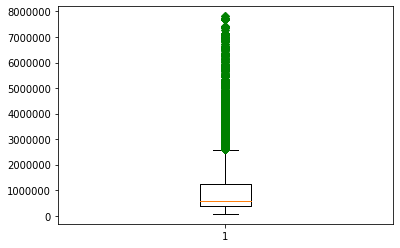

In [166]:
P2= Sample6['LIMITE']
plt.boxplot(P2,0,'gD')
plt.show()

In [167]:
Sample6.describe()

,ATRASO,EDAD,SALDO,ANTIGUEDAD,AJUSTE_PLAN_CUOTAS,CANCELACION_ANTICIPADA,INCONSISTENCIA_CTA,REVERSO_ADMCTA,REVERSO_CPMV,REVERSO_CPMV2,...,SIN_SALDO_U3M,LIMITE,RANGO_LIMITE,USO_0,BAJA_SALDO_U6M,BAJA_SALDO_U3M,MAX_MORAU12M,MAX_MORAU6M,MAX_MORAU3M,Q
count,25566.000000,25566.000000,2.556600e+04,25566.000000,25566.000000,25566.000000,25566.000000,25566.000000,25566.000000,25566.000000,...,25566.000000,2.556600e+04,25566.000000,25566.000000,25566.000000,25566.000000,25566.000000,25566.000000,25566.000000,25566.0
mean,0.460534,42.176954,2.283207e+05,43.739967,0.025346,0.159626,0.005163,0.016663,0.078033,0.018697,...,1.028593,1.023596e+06,7.758899,0.268903,2.524681,1.271337,4.952984,3.094774,2.066143,1.0
std,3.746044,12.618898,4.014766e+05,25.309977,0.185908,0.577415,0.076425,0.129526,0.304431,0.140278,...,1.320291,1.101143e+06,4.194787,0.323537,1.805049,1.019442,10.241778,8.258141,6.726320,0.0
min,0.000000,20.000000,-5.939236e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7.000000e+04,1.000000,-1.178420,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,32.000000,0.000000e+00,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.710000e+05,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.000000,40.000000,9.100626e+04,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.880000e+05,6.000000,0.126393,3.000000,1.000000,0.000000,0.000000,0.000000,1.0
75%,0.000000,52.000000,2.944138e+05,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,1.260000e+06,12.000000,0.489981,4.000000,2.000000,5.000000,2.000000,0.000000,1.0
max,88.000000,91.000000,4.865636e+06,102.000000,6.000000,15.000000,2.000000,2.000000,5.000000,3.000000,...,3.000000,7.812000e+06,16.000000,7.836546,6.000000,3.000000,92.000000,92.000000,92.000000,1.0


In [168]:
Sample7 = Sample6[(Sample6.USO_0 <=2 )]

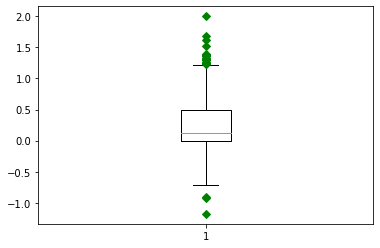

In [169]:
P3= Sample7['USO_0']
plt.boxplot(P3,0,'gD')
plt.show()

In [170]:
Sample7.describe()

,ATRASO,EDAD,SALDO,ANTIGUEDAD,AJUSTE_PLAN_CUOTAS,CANCELACION_ANTICIPADA,INCONSISTENCIA_CTA,REVERSO_ADMCTA,REVERSO_CPMV,REVERSO_CPMV2,...,SIN_SALDO_U3M,LIMITE,RANGO_LIMITE,USO_0,BAJA_SALDO_U6M,BAJA_SALDO_U3M,MAX_MORAU12M,MAX_MORAU6M,MAX_MORAU3M,Q
count,25561.000000,25561.000000,2.556100e+04,25561.000000,25561.000000,25561.000000,25561.000000,25561.000000,25561.000000,25561.000000,...,25561.000000,2.556100e+04,25561.000000,25561.000000,25561.000000,25561.000000,25561.000000,25561.000000,25561.000000,25561.0
mean,0.460624,42.177966,2.279663e+05,43.742733,0.025351,0.159501,0.005164,0.016666,0.078049,0.018700,...,1.028755,1.023693e+06,7.759282,0.268187,2.524588,1.271273,4.953288,3.094715,2.065882,1.0
std,3.746405,12.619385,4.004287e+05,25.311091,0.185926,0.576968,0.076432,0.129538,0.304459,0.140291,...,1.320357,1.101225e+06,4.195020,0.317994,1.805170,1.019432,10.242582,8.258731,6.726687,0.0
min,0.000000,20.000000,-5.939236e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7.000000e+04,1.000000,-1.178420,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,32.000000,0.000000e+00,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.710000e+05,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.000000,40.000000,9.095194e+04,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.880000e+05,6.000000,0.126382,3.000000,1.000000,0.000000,0.000000,0.000000,1.0
75%,0.000000,52.000000,2.942649e+05,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,1.260000e+06,12.000000,0.489604,4.000000,2.000000,5.000000,2.000000,0.000000,1.0
max,88.000000,91.000000,4.865636e+06,102.000000,6.000000,15.000000,2.000000,2.000000,5.000000,3.000000,...,3.000000,7.812000e+06,16.000000,1.999083,6.000000,3.000000,92.000000,92.000000,92.000000,1.0


In [171]:
Sample7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25561 entries, 0 to 26692
Data columns (total 52 columns):
ATRASO                    25561 non-null int64
EDAD                      25561 non-null int64
SALDO                     25561 non-null float64
SIN_SALDO_HOY             25561 non-null object
ANTIGUEDAD                25561 non-null int64
referencia_rescate        2629 non-null object
MARCA_RESCATE             25561 non-null object
TARJETA_ACTIVA            25561 non-null object
sexo                      25561 non-null object
estado_civil              25561 non-null object
tipo_ingreso              10753 non-null object
AJUSTE_PLAN_CUOTAS        25561 non-null int64
CANCELACION_ANTICIPADA    25561 non-null int64
ERROR_PAGO_SERVICIOS      25561 non-null object
INCONSISTENCIA_CTA        25561 non-null int64
PAGO_INCORRECTO           25561 non-null object
REVERSO_ADMCTA            25561 non-null int64
REVERSO_CPMV              25561 non-null int64
REVERSO_CPMV2             25561 non

In [172]:
Sample8=Sample7.filter(["ATRASO", "EDAD", "SALDO", "SIN_SALDO_HOY", "ANTIGUEDAD", "sexo", "AJUSTE_PLAN_CUOTAS",
                "CANCELACION_ANTICIPADA", "REVERSO_ADMCTA", "REVERSO_CPMV", "REVERSO_CPMV2","REVERSO_INTERESES","SUMA_QUEJAS",
                "MONETARY", "FREQUENCY", "RECENCY", "Q_MONETARY", "Q_FREQUENCY", "Q_RECENCY", "CUOTA_MAXIMA", "SIN_SALDO_U12M",
                "SIN_SALDO_U6M", "SIN_SALDO_U3M","LIMITE","USO_0","BAJA_SALDO_U6M","BAJA_SALDO_U3M","MARCA_CONGELADA",
                "MAX_MORAU12M","MAX_MORAU6M","MAX_MORAU3M","AREA_RIESGO","MARCA_SOLTERO","MARCA_QUEJAS","MARCA_SIN_SALDO_U12M",
                "MARCA_SIN_SALDO_U6M","MARCA_SIN_SALDO_U3M","MARCA_BAJA_U6M","MARCA_BAJA_U3M","TARJETA_ACTIVA","MARCA_RESCATE"])

In [173]:
#Se excluyen variables donde la mayoría de los clientes presentan el mismo valor, como en la variable "Nacional". 
#También campos tipo de ingreso, donde más de un 50% mostraba valores en blanco.

In [174]:
Sample8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25561 entries, 0 to 26692
Data columns (total 41 columns):
ATRASO                    25561 non-null int64
EDAD                      25561 non-null int64
SALDO                     25561 non-null float64
SIN_SALDO_HOY             25561 non-null object
ANTIGUEDAD                25561 non-null int64
sexo                      25561 non-null object
AJUSTE_PLAN_CUOTAS        25561 non-null int64
CANCELACION_ANTICIPADA    25561 non-null int64
REVERSO_ADMCTA            25561 non-null int64
REVERSO_CPMV              25561 non-null int64
REVERSO_CPMV2             25561 non-null int64
REVERSO_INTERESES         25561 non-null int64
SUMA_QUEJAS               25561 non-null int64
MONETARY                  25561 non-null float64
FREQUENCY                 25561 non-null int64
RECENCY                   25561 non-null int64
Q_MONETARY                25561 non-null object
Q_FREQUENCY               25561 non-null object
Q_RECENCY                 25561 non-n

In [175]:
Base1=Sample8.filter(["ATRASO", "EDAD", "SALDO", "ANTIGUEDAD", "sexo", "AJUSTE_PLAN_CUOTAS","CANCELACION_ANTICIPADA",
                "REVERSO_ADMCTA", "REVERSO_CPMV", "REVERSO_CPMV2","REVERSO_INTERESES","MONETARY", "FREQUENCY", "RECENCY",
                "CUOTA_MAXIMA", "SIN_SALDO_U6M","LIMITE","BAJA_SALDO_U6M","MARCA_CONGELADA","MAX_MORAU6M","AREA_RIESGO",
                "MARCA_SOLTERO","TARJETA_ACTIVA","MARCA_RESCATE"])

In [176]:
#En esta primera base previo a probar los modelos, se excluyen variables con correlaciones altas entre ellas, 
#ya sean positivas o negativas.

In [177]:
Base1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25561 entries, 0 to 26692
Data columns (total 24 columns):
ATRASO                    25561 non-null int64
EDAD                      25561 non-null int64
SALDO                     25561 non-null float64
ANTIGUEDAD                25561 non-null int64
sexo                      25561 non-null object
AJUSTE_PLAN_CUOTAS        25561 non-null int64
CANCELACION_ANTICIPADA    25561 non-null int64
REVERSO_ADMCTA            25561 non-null int64
REVERSO_CPMV              25561 non-null int64
REVERSO_CPMV2             25561 non-null int64
REVERSO_INTERESES         25561 non-null int64
MONETARY                  25561 non-null float64
FREQUENCY                 25561 non-null int64
RECENCY                   25561 non-null int64
CUOTA_MAXIMA              25561 non-null int64
SIN_SALDO_U6M             25561 non-null int64
LIMITE                    25561 non-null float64
BAJA_SALDO_U6M            25561 non-null int64
MARCA_CONGELADA           25561 non-nu

In [178]:
#features
features = Base1.iloc[:,0:23]

In [179]:
#dependent variable
depVar = Base1['MARCA_RESCATE']

In [182]:
#Training Set (Feature Space: X Training)
X_train = (features[0:17893])

In [183]:
#Dependent Variable Training Set (y Training)
Y_train = depVar[0:17893]

In [184]:
#Testing Set (X Testing)
X_test = features[17893:25561]

In [185]:
#Ground Truth (y_test) 
Y_test = depVar[17893:25561]

In [186]:
X_train.shape, X_test.shape

((17893, 23), (7668, 23))

In [187]:
modeltree = tree.DecisionTreeClassifier()

In [188]:
modeltree_train = modeltree.fit(X_train, Y_train)

In [189]:
modeltree_train

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [190]:
modelsvm = svm.SVC(kernel='rbf')

In [191]:
modelsvm_train = modelsvm.fit(X_train, Y_train)

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [192]:
modelsvm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [193]:
modeldecisiontree = DecisionTreeClassifier(random_state=0)

In [194]:
modeldecisiontree_train = modeldecisiontree.fit(X_train, Y_train)

In [195]:
modeldecisiontree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [196]:
modelgradient = SGDClassifier(loss="hinge", penalty="l2", max_iter=400)

In [197]:
modelgradient_train = modelgradient.fit(X_train, Y_train)

In [198]:
modelgradient

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=400, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [199]:
modellogistic = LogisticRegression(max_iter=300, random_state=0, solver='lbfgs')

In [200]:
modellogistic_train = modellogistic.fit(X_train, Y_train)

In [201]:
modellogistic

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [202]:
modelrandomf = RandomForestClassifier(n_estimators=400, random_state=0)

In [203]:
modelrandomf_train = modelrandomf.fit(X_train, Y_train)

In [204]:
modelrandomf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [205]:
modelnet = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=0, max_iter=300)

In [206]:
modelnet_train = modelnet.fit(X_train, Y_train)

In [207]:
modelnet

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [208]:
#choosing the right model
print(cross_val_score(modeltree, X_train, Y_train))

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.88901928 0.65157612 0.63464118]


In [209]:
print(cross_val_score(modelsvm, X_train, Y_train))

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\tgarita\appdata\local\programs\

[0.90829841 0.90794769 0.90677398]


In [210]:
print(cross_val_score(modellogistic, X_train, Y_train))

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.90829841 0.90828303 0.90828303]


In [211]:
print(cross_val_score(modeldecisiontree, X_train, Y_train))

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.88868399 0.65073776 0.65945674]


In [212]:
print(cross_val_score(modelgradient, X_train, Y_train))

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.90813076 0.60311871 0.90828303]


In [213]:
print(cross_val_score(modellogistic, X_train, Y_train))

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.90829841 0.90828303 0.90828303]


In [214]:
print(cross_val_score(modelrandomf, X_train, Y_train))

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.90829841 0.90761234 0.60680751]


In [215]:
print(cross_val_score(modelnet, X_train, Y_train))

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.86906957 0.86955064 0.85077129]


In [216]:
modeltree.score(X_train,Y_train)

0.9997205611132846

In [217]:
modelsvm.score(X_train,Y_train)

0.9851897390040798

In [218]:
modeldecisiontree.score(X_train,Y_train)

0.9997205611132846

In [219]:
modelgradient.score(X_train,Y_train)

0.9082322696026379

In [220]:
modellogistic.score(X_train,Y_train)

0.908288157379981

In [221]:
modelrandomf.score(X_train,Y_train)

0.9997205611132846

In [222]:
modelnet.score(X_train,Y_train)

0.5763147599619963

In [223]:
predictionstree = modeltree.predict(X_test)

In [224]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(Y_test, predictionstree)

In [225]:
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [226]:
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,4620,2060
Actual Positive,681,307


In [227]:
predictionssvm = modelsvm.predict(X_test)

In [228]:
cmsvm = metrics.confusion_matrix(Y_test, predictionssvm)

In [229]:
cmsvm_df = pd.DataFrame(cmsvm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [230]:
cmsvm_df

,Predicted Negative,Predicted Positive
Actual Negative,6680,0
Actual Positive,988,0


In [231]:
predictionsdecisiontree = modeldecisiontree.predict(X_test)

In [232]:
cmdecisiontree = metrics.confusion_matrix(Y_test, predictionsdecisiontree)

In [233]:
cmdecisiontree_df = pd.DataFrame(cmdecisiontree, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [234]:
cmdecisiontree_df

,Predicted Negative,Predicted Positive
Actual Negative,4672,2008
Actual Positive,692,296


In [235]:
predictionsgradient = modelgradient.predict(X_test)

In [236]:
cmgradient = metrics.confusion_matrix(Y_test, predictionsgradient)

In [237]:
cmgradient_df = pd.DataFrame(cmgradient, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [238]:
cmgradient_df

,Predicted Negative,Predicted Positive
Actual Negative,6680,0
Actual Positive,988,0


In [239]:
predictionslogistic = modellogistic.predict(X_test)

In [240]:
cmlogistic = metrics.confusion_matrix(Y_test, predictionslogistic)

In [241]:
cmlogistic_df = pd.DataFrame(cmlogistic, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [242]:
cmlogistic_df

,Predicted Negative,Predicted Positive
Actual Negative,6680,0
Actual Positive,988,0


In [243]:
predictionsrandom = modelrandomf.predict(X_test)

In [244]:
cmrandom = metrics.confusion_matrix(Y_test, predictionsrandom)

In [245]:
cmrandom_df = pd.DataFrame(cmrandom, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [246]:
cmrandom_df

,Predicted Negative,Predicted Positive
Actual Negative,6611,69
Actual Positive,871,117


In [247]:
predictionsnet = modelnet.predict(X_test)

In [248]:
cmnet = metrics.confusion_matrix(Y_test, predictionsnet)

In [249]:
cmnet_df = pd.DataFrame(cmnet, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [250]:
cmnet_df

,Predicted Negative,Predicted Positive
Actual Negative,4512,2168
Actual Positive,747,241


In [251]:
Base2=Sample8.filter(["ATRASO", "EDAD", "SALDO", "ANTIGUEDAD", "sexo", "SUMA_QUEJAS","MONETARY", "FREQUENCY", "RECENCY",
                "CUOTA_MAXIMA", "SIN_SALDO_U12M","LIMITE","BAJA_SALDO_U6M","MARCA_CONGELADA","MAX_MORAU12M","AREA_RIESGO",
                "MARCA_SOLTERO","TARJETA_ACTIVA","MARCA_RESCATE"])

In [252]:
Base2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25561 entries, 0 to 26692
Data columns (total 19 columns):
ATRASO             25561 non-null int64
EDAD               25561 non-null int64
SALDO              25561 non-null float64
ANTIGUEDAD         25561 non-null int64
sexo               25561 non-null object
SUMA_QUEJAS        25561 non-null int64
MONETARY           25561 non-null float64
FREQUENCY          25561 non-null int64
RECENCY            25561 non-null int64
CUOTA_MAXIMA       25561 non-null int64
SIN_SALDO_U12M     25561 non-null int64
LIMITE             25561 non-null float64
BAJA_SALDO_U6M     25561 non-null int64
MARCA_CONGELADA    25561 non-null object
MAX_MORAU12M       25561 non-null int64
AREA_RIESGO        25561 non-null object
MARCA_SOLTERO      25561 non-null object
TARJETA_ACTIVA     25561 non-null object
MARCA_RESCATE      25561 non-null object
dtypes: float64(3), int64(10), object(6)
memory usage: 3.9+ MB


In [253]:
#features
features2 = Base2.iloc[:,0:18]

In [254]:
#dependent variable
depVar2 = Base2['MARCA_RESCATE']

In [255]:
X_train2 = (features2[0:17893])

In [256]:
Y_train2 = depVar2[0:17893]

In [257]:
X_test2 = features2[17893:25561]

In [258]:
Y_test2 = depVar2[17893:25561]

In [259]:
X_train2.shape, X_test2.shape

((17893, 18), (7668, 18))

In [260]:
modeltree_train2 = modeltree.fit(X_train2, Y_train2)

In [261]:
modeldecisiontree_train2 = modeldecisiontree.fit(X_train2, Y_train2)

In [262]:
modelgradient_train2 = modelgradient.fit(X_train2, Y_train2)

In [263]:
modelrandomf_train2 = modelrandomf.fit(X_train2, Y_train2)

In [264]:
modelnet_train2 = modelnet.fit(X_train2, Y_train2)

In [265]:
print(cross_val_score(modeltree, X_train2, Y_train2))

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.89019279 0.63615023 0.66431925]


In [266]:
print(cross_val_score(modeldecisiontree, X_train2, Y_train2))

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.88466052 0.64973172 0.66515761]


In [267]:
print(cross_val_score(modelgradient, X_train2, Y_train2))

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.90746018 0.90744467 0.9084507 ]


In [268]:
print(cross_val_score(modelrandomf, X_train2, Y_train2))

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.90796312 0.9102951  0.61653253]


In [269]:
print(cross_val_score(modelnet, X_train2, Y_train2))

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.78843252 0.73289738 0.75285044]


In [270]:
modeltree.score(X_train2,Y_train2)

0.9998323366679707

In [271]:
modeldecisiontree.score(X_train2,Y_train2)

0.9998323366679707

In [272]:
modelgradient.score(X_train2,Y_train2)

0.47582853629911137

In [273]:
modelrandomf.score(X_train2,Y_train2)

0.9998323366679707

In [274]:
modelnet.score(X_train2,Y_train2)

0.7558263007880177

In [275]:
predictionstree2 = modeltree.predict(X_test2)

In [276]:
cm2 = metrics.confusion_matrix(Y_test2, predictionstree2)

In [277]:
cm_df2 = pd.DataFrame(cm2, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [278]:
cm_df2

,Predicted Negative,Predicted Positive
Actual Negative,4397,2283
Actual Positive,699,289


In [279]:
predictionsgradient2 = modelgradient.predict(X_test2)

In [280]:
cmgradient2 = metrics.confusion_matrix(Y_test2, predictionsgradient2)

In [281]:
cmgradient_df2 = pd.DataFrame(cmgradient2, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [282]:
cmgradient_df2

,Predicted Negative,Predicted Positive
Actual Negative,3943,2737
Actual Positive,459,529


In [283]:
3943/6680

0.5902694610778443

In [284]:
529/988

0.5354251012145749

In [285]:
predictionsrandom2 = modelrandomf.predict(X_test2)

In [286]:
cmrandom2 = metrics.confusion_matrix(Y_test2, predictionsrandom2)

In [287]:
cmrandom_df2 = pd.DataFrame(cmrandom2, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [288]:
cmrandom_df2

,Predicted Negative,Predicted Positive
Actual Negative,6606,74
Actual Positive,883,105


In [289]:
predictionsnet2 = modelnet.predict(X_test2)

In [290]:
cmnet2 = metrics.confusion_matrix(Y_test2, predictionsnet2)

In [291]:
cmnet_df2 = pd.DataFrame(cmnet2, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [292]:
cmnet_df2

,Predicted Negative,Predicted Positive
Actual Negative,6416,264
Actual Positive,948,40


In [293]:
Base3=Sample8.filter(["ATRASO", "EDAD", "SIN_SALDO_HOY", "ANTIGUEDAD", "sexo", "MARCA_QUEJAS","Q_MONETARY", "Q_FREQUENCY", 
                "Q_RECENCY","CUOTA_MAXIMA", "MARCA_SIN_SALDO_U12M","USO_0","MARCA_BAJA_U3M","MARCA_CONGELADA","MAX_MORAU12M",
                "AREA_RIESGO","MARCA_SOLTERO","LIMITE","TARJETA_ACTIVA","MARCA_RESCATE"])

In [294]:
features3 = Base3.iloc[:,0:19]

In [295]:
depVar3 = Base3['MARCA_RESCATE']

In [296]:
X_train3 = (features3[0:17893])

In [297]:
Y_train3 = depVar3[0:17893]

In [298]:
X_test3 = features3[17893:25561]

In [299]:
Y_test3 = depVar3[17893:25561]

In [300]:
modeltree_train3 = modeltree.fit(X_train3, Y_train3)

In [301]:
modeldecisiontree_train3 = modeldecisiontree.fit(X_train3, Y_train3)

In [302]:
modelrandomf_train3 = modelrandomf.fit(X_train3, Y_train3)

In [303]:
modelgradient_train3 = modelgradient.fit(X_train3, Y_train3)

In [304]:
print(cross_val_score(modeltree, X_train3, Y_train3))

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.88717519 0.6676727  0.62055667]


In [305]:
print(cross_val_score(modeldecisiontree, X_train3, Y_train3))

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.88499581 0.67018779 0.60949027]


In [306]:
print(cross_val_score(modelrandomf, X_train3, Y_train3))

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.90796312 0.90761234 0.61401744]


In [307]:
print(cross_val_score(modelgradient, X_train3, Y_train3))

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.90829841 0.90828303 0.90828303]


In [308]:
modeltree.score(X_train3,Y_train3)

0.9998323366679707

In [309]:
modeldecisiontree.score(X_train3,Y_train3)

0.9998323366679707

In [310]:
modelrandomf.score(X_train3,Y_train3)

0.9998323366679707

In [311]:
modelgradient.score(X_train3,Y_train3)

0.091711842620019

In [312]:
predictionstree3 = modeltree.predict(X_test3)

In [313]:
cm3= metrics.confusion_matrix(Y_test3, predictionstree3)

In [314]:
cm_df3 = pd.DataFrame(cm3, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [315]:
cm_df3

,Predicted Negative,Predicted Positive
Actual Negative,5469,1211
Actual Positive,728,260


In [316]:
predictionsdecisiontree3 = modeldecisiontree.predict(X_test3)

In [317]:
cmdecisiontree3= metrics.confusion_matrix(Y_test3, predictionsdecisiontree3)

In [318]:
cmdecisiontree_df3 = pd.DataFrame(cmdecisiontree3, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [319]:
cmdecisiontree_df3

,Predicted Negative,Predicted Positive
Actual Negative,5695,985
Actual Positive,769,219


In [320]:
predictionsgradient3 = modelgradient.predict(X_test3)

In [323]:
cmgradient3= metrics.confusion_matrix(Y_test3, predictionsgradient3)

In [324]:
cmgradient_df3 = pd.DataFrame(cmgradient3, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [325]:
cmgradient_df3

,Predicted Negative,Predicted Positive
Actual Negative,0,6680
Actual Positive,0,988


In [326]:
Base4=Sample8.filter(["ATRASO", "EDAD", "SALDO", "ANTIGUEDAD", "sexo", "SUMA_QUEJAS","MONETARY", "FREQUENCY", "RECENCY",
                "CUOTA_MAXIMA", "SIN_SALDO_U12M","LIMITE","BAJA_SALDO_U6M","MARCA_CONGELADA","MAX_MORAU12M","AREA_RIESGO",
                "MARCA_SOLTERO","TARJETA_ACTIVA","MARCA_RESCATE"])

In [327]:
from sklearn.preprocessing import StandardScaler

In [328]:
sc_x = StandardScaler()

In [333]:
features4 = Base4.iloc[:,0:18]

In [334]:
depVar4 = Base4['MARCA_RESCATE']

In [335]:
X_train4 = (features4[0:17893])

In [336]:
Y_train4 = depVar4[0:17893]

In [337]:
X_test4 = features4[17893:25561]

In [338]:
Y_test4 = depVar4[17893:25561]

In [339]:
X_train4.shape, X_test4.shape

((17893, 18), (7668, 18))

In [340]:
X_train4_2 = sc_x.fit_transform(X_train4)

In [344]:
X_test4_2 = sc_x.fit_transform(X_test4)

In [345]:
modeltree_train4 = modeltree.fit(X_train4_2, Y_train4)

In [346]:
modelsvm_train4 = modelsvm.fit(X_train4_2, Y_train4)

In [347]:
modeldecisiontree_train4 = modeldecisiontree.fit(X_train4_2, Y_train4)

In [348]:
modelgradient_train4 = modelgradient.fit(X_train4_2, Y_train4)

In [349]:
modellogistic_train4 = modellogistic.fit(X_train4_2, Y_train4)

In [350]:
modelrandomf_train4 = modelrandomf.fit(X_train4_2, Y_train2)

In [351]:
modelnet_train4 = modelnet.fit(X_train4_2, Y_train4)

In [352]:
print(cross_val_score(modeltree, X_train4_2, Y_train4))

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.89304275 0.63983903 0.65677398]


In [353]:
print(cross_val_score(modelsvm, X_train4_2, Y_train4))

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\tgarita\appdata\local\programs\

[0.90578374 0.91281019 0.90979209]


In [354]:
print(cross_val_score(modeldecisiontree, X_train4_2, Y_train4))

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.88784577 0.63397049 0.55566734]


In [355]:
print(cross_val_score(modelgradient, X_train4_2, Y_train4))

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.88583403 0.90828303 0.90593561]


In [356]:
print(cross_val_score(modellogistic, X_train4_2, Y_train4))

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.9086337  0.91264252 0.9066063 ]


In [357]:
print(cross_val_score(modelrandomf, X_train4_2, Y_train4))

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.90813076 0.90828303 0.6130114 ]


In [358]:
print(cross_val_score(modelnet, X_train4_2, Y_train4))

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.89823973 0.87558685 0.54946345]


In [359]:
modeltree.score(X_train4_2,Y_train4)

0.9998323366679707

In [360]:
modelsvm.score(X_train4_2,Y_train4)

0.9158330073212988

In [361]:
modeldecisiontree.score(X_train4_2,Y_train4)

0.9998323366679707

In [362]:
modelgradient.score(X_train4_2,Y_train4)

0.908288157379981

In [363]:
modellogistic.score(X_train4_2,Y_train4)

0.9123679651260269

In [364]:
modelrandomf.score(X_train4_2,Y_train4)

0.9998323366679707

In [365]:
modelnet.score(X_train4_2,Y_train4)

0.9343318616218633

In [366]:
predictionstree4 = modeltree.predict(X_test4_2)

In [367]:
cmtree4= metrics.confusion_matrix(Y_test4, predictionstree4)

In [368]:
cmtree_df4 = pd.DataFrame(cmtree4, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [369]:
cmtree_df4

,Predicted Negative,Predicted Positive
Actual Negative,5762,918
Actual Positive,751,237


In [370]:
predictionssvm4 = modelsvm.predict(X_test4_2)

In [371]:
cmsvm4= metrics.confusion_matrix(Y_test4, predictionssvm4)

In [372]:
cmsvm_df4 = pd.DataFrame(cmsvm4, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [373]:
cmsvm_df4

,Predicted Negative,Predicted Positive
Actual Negative,6608,72
Actual Positive,892,96


In [374]:
predictionsdecisiontree4 = modeldecisiontree.predict(X_test4_2)

In [375]:
cmdecisiontree4= metrics.confusion_matrix(Y_test4, predictionsdecisiontree4)

In [376]:
cmdecisiontree_df4 = pd.DataFrame(cmdecisiontree4, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [377]:
cmdecisiontree_df4

,Predicted Negative,Predicted Positive
Actual Negative,5787,893
Actual Positive,753,235


In [378]:
predictionsgradient4 = modelgradient.predict(X_test4_2)

In [379]:
cmgradient4= metrics.confusion_matrix(Y_test4, predictionsgradient4)

In [380]:
cmgradient_df4 = pd.DataFrame(cmgradient4, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [381]:
cmgradient_df4

,Predicted Negative,Predicted Positive
Actual Negative,6680,0
Actual Positive,988,0


In [382]:
predictionslogistic4 = modellogistic.predict(X_test4_2)

In [383]:
cmlogistic4= metrics.confusion_matrix(Y_test4, predictionslogistic4)

In [384]:
cmlogistic_df4 = pd.DataFrame(cmlogistic4, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [385]:
cmlogistic_df4

,Predicted Negative,Predicted Positive
Actual Negative,6616,64
Actual Positive,895,93


In [386]:
predictionsrandomf4 = modelrandomf.predict(X_test4_2)

In [387]:
cmrandomf4= metrics.confusion_matrix(Y_test4, predictionsrandomf4)

In [388]:
cmrandomf_df4 = pd.DataFrame(cmrandomf4, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [389]:
cmrandomf_df4

,Predicted Negative,Predicted Positive
Actual Negative,6601,79
Actual Positive,882,106


In [390]:
predictionsnet4 = modelnet.predict(X_test4_2)

In [391]:
cmnet4= metrics.confusion_matrix(Y_test4, predictionsnet4)

In [392]:
cmnet_df4 = pd.DataFrame(cmnet4, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [393]:
cmnet_df4

,Predicted Negative,Predicted Positive
Actual Negative,6374,306
Actual Positive,858,130
